<a href="https://colab.research.google.com/github/Shreya111111/Machine-Learning/blob/main/ML_LogisticRegression_Tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [24]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
from sklearn.preprocessing import OneHotEncoder

Instructions for updating:
non-resource variables are not supported in the long term


Sigmoid Function

In [ ]:
def sigmoid(z):
    return 1 / (1 + np.exp( - z))

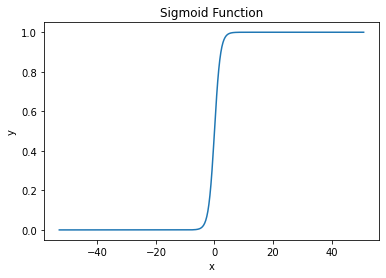

In [ ]:
plt.plot(np.arange(-53, 51, 0.178), sigmoid(np.arange(-53, 51, 0.178)))
plt.title('Sigmoid Function')
plt.xlabel('x')
plt.ylabel('y')
  
plt.show()

In [ ]:
from google.colab import files
import io
data = files.upload()

Saving dataset.csv to dataset.csv


In [14]:
df=pd.read_csv(io.StringIO(data['dataset.csv'].decode('utf-8')))

In [15]:
print("Data Shape:", df.shape)
  
print(df.head())

Data Shape: (99, 4)
   0  5.1  3.5  1
0  1  4.9  3.0  1
1  2  4.7  3.2  1
2  3  4.6  3.1  1
3  4  5.0  3.6  1
4  5  5.4  3.9  1


In [18]:
x_orig = df.iloc[:, 1:-1].values
y_orig = df.iloc[:, -1:].values
  
print(x_orig.shape)
print(y_orig.shape)

(99, 2)
(99, 1)


NameError: ignored

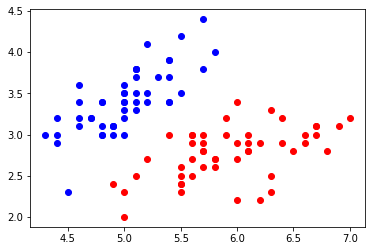

In [32]:
# Positive Data Points
x_pos = np.array([x_orig[i] for i in range(len(x_orig))
                                    if y_orig[i] == 1])
  
# Negative Data Points
x_neg = np.array([x_orig[i] for i in range(len(x_orig))
                                    if y_orig[i] == 0])
  
# Plotting the Positive Data Points
plt.scatter(x_pos[:, 0], x_pos[:, 1], color = 'blue', label = 'Positive')
  
# Plotting the Negative Data Points
plt.scatter(x_neg[:, 0], x_neg[:, 1], color = 'red', label = 'Negative')
plt.plot(decision_boundary_x, decision_boundary_y)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Plot of given data')
plt.legend()
  
plt.show()

In [21]:
# Creating the One Hot Encoder
oneHot = OneHotEncoder()
  
# Encoding x_orig
oneHot.fit(x_orig)
x = oneHot.transform(x_orig).toarray()
  
# Encoding y_orig
oneHot.fit(y_orig)
y = oneHot.transform(y_orig).toarray()
  
alpha, epochs = 0.00365, 500
m, n = x.shape
print('m =', m)
print('n =', n)
print('Learning Rate =', alpha)
print('Number of Epochs =', epochs)

m = 99
n = 51
Learning Rate = 0.00365
Number of Epochs = 500


In [25]:
# There are n columns in the feature matrix
# after One Hot Encoding.
X = tf.placeholder(tf.float32, [None, n])

# Since this is a binary classification problem,
# Y can take only 2 values.
Y = tf.placeholder(tf.float32, [None, 2])

# Trainable Variable Weights
W = tf.Variable(tf.zeros([n, 2]))

# Trainable Variable Bias
b = tf.Variable(tf.zeros([2]))


In [26]:
# Hypothesis
Y_hat = tf.nn.sigmoid(tf.add(tf.matmul(X, W), b))

# Sigmoid Cross Entropy Cost Function
cost = tf.nn.sigmoid_cross_entropy_with_logits(
					logits = Y_hat, labels = Y)

# Gradient Descent Optimizer
optimizer = tf.train.GradientDescentOptimizer(
		learning_rate = alpha).minimize(cost)

# Global Variables Initializer
init = tf.global_variables_initializer()


In [27]:
# Starting the Tensorflow Session
with tf.Session() as sess:
	
	# Initializing the Variables
	sess.run(init)
	
	# Lists for storing the changing Cost and Accuracy in every Epoch
	cost_history, accuracy_history = [], []
	
	# Iterating through all the epochs
	for epoch in range(epochs):
		cost_per_epoch = 0
		
		# Running the Optimizer
		sess.run(optimizer, feed_dict = {X : x, Y : y})
		
		# Calculating cost on current Epoch
		c = sess.run(cost, feed_dict = {X : x, Y : y})
		
		# Calculating accuracy on current Epoch
		correct_prediction = tf.equal(tf.argmax(Y_hat, 1),
										tf.argmax(Y, 1))
		accuracy = tf.reduce_mean(tf.cast(correct_prediction,
												tf.float32))
		
		# Storing Cost and Accuracy to the history
		cost_history.append(sum(sum(c)))
		accuracy_history.append(accuracy.eval({X : x, Y : y}) * 100)
		
		# Displaying result on current Epoch
		if epoch % 100 == 0 and epoch != 0:
			print("Epoch " + str(epoch) + " Cost: "
							+ str(cost_history[-1]))
	
	Weight = sess.run(W) # Optimized Weight
	Bias = sess.run(b) # Optimized Bias
	
	# Final Accuracy
	correct_prediction = tf.equal(tf.argmax(Y_hat, 1),
									tf.argmax(Y, 1))
	accuracy = tf.reduce_mean(tf.cast(correct_prediction,
											tf.float32))
	print("\nAccuracy:", accuracy_history[-1], "%")


Epoch 100 Cost: 134.90487670898438
Epoch 200 Cost: 131.2930679321289
Epoch 300 Cost: 128.38414001464844
Epoch 400 Cost: 125.91455078125

Accuracy: 88.88888955116272 %


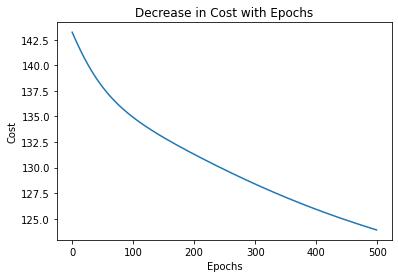

In [28]:
plt.plot(list(range(epochs)), cost_history)
plt.xlabel('Epochs')
plt.ylabel('Cost')
plt.title('Decrease in Cost with Epochs')

plt.show()


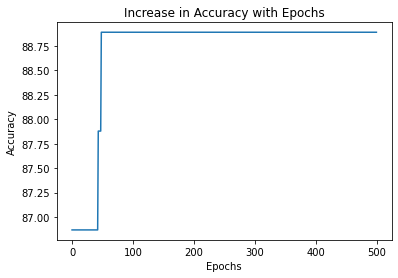

In [29]:
plt.plot(list(range(epochs)), accuracy_history)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Increase in Accuracy with Epochs')

plt.show()
